<a href="https://colab.research.google.com/github/MichaelKupfer/MAT421/blob/main/mat421_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chapter 1 - Linear Equations

1.1 Linear Algebra and Systems of Linear Equations

Linear algebra can primarily be defined by vectors and matrices. Vectors can be either row or column vector and represent points in R^n. Vectors are linearly independent if none of the vectors can be written as a linear combination of the others. 

Matrices are tables of numbers and have several important properties such as determinant, rank, and inverse. One advantage of matrices is that they can be used to solve systems of linear equations. There are multiple methods to solve these systems such as: Gauss Elimination, Gauss-Jordan Elimination, LU Decomposition, and Gauss-Seidel. Of course, Python has its own function that uses LU Decomposition to solve these systems very quickly

Practice: Use solve method from numpy to find the solution to the system

In [ ]:
import numpy as np

#A is the initial array and is a 3x3 matrix. Each row represents an equation while the columns represent the different variables.
A = np.array([[4, 3, -5], 
              [-2, -4, 5], 
              [8, 8, 0]])
#y contains the right side values of the system of equations. 
y = np.array([2, 5, -3])

#use solve method to determine solutions
x = np.linalg.solve(A, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


This solution can be checked by also using the matrix inverse method which simply takes the inverse of the square and multiplies it with the y matrix.

Practice: Confirm solution using inverse

In [ ]:
#Create the inverse matrix
A_inv = np.linalg.inv(A)

#Solve for x
x = np.dot(A_inv, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


We can also decompose the solution into the L and U matrices to follow along with the solution

In [ ]:
from scipy.linalg import lu

P, L, U = lu(A)
print('P:\n', P)
print('L:\n', L)
print('U:\n', U)
print('LU:\n',np.dot(L, U))

P:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L:
 [[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.5   0.5   1.  ]]
U:
 [[ 8.   8.   0. ]
 [ 0.  -2.   5. ]
 [ 0.   0.  -7.5]]
LU:
 [[ 8.  8.  0.]
 [-2. -4.  5.]
 [ 4.  3. -5.]]


The P matrix is the permutation matrix that moves the equations around in order to create easier calculations. 

We can also use these methods to find inverses for larger and larger matrices. By setting the right side variables to be the corresponding values of [1,0,0,0] and solving the systems we can determine the inverse.

Practice: Find the inverse of a 4x4 matrix by using the solve method in numpy

In [ ]:
#Create 4x4 matrix
M = np.array([[4, 3, -5, 1], 
              [-2, -4, 5, 3], 
              [8, 8, 0, 2],
              [4, 2, 3, 5]])

#Parameters for inverse
y1 = np.array([1,0,0,0])
y2 = np.array([0,1,0,0])
y3 = np.array([0,0,1,0])
y4 = np.array([0,0,0,1])

#Solve each system
x1 = np.linalg.solve(M, y1)
x2 = np.linalg.solve(M, y2)
x3 = np.linalg.solve(M, y3)
x4 = np.linalg.solve(M, y4)
print(x1)
print(x2)
print(x3)
print(x4)

#Confirm solution matches
M_inv = np.linalg.inv(M)
print(M_inv)

[ 0.72413793 -0.65517241 -0.06896552 -0.27586207]
[ 1.60344828 -1.37931034  0.27586207 -0.89655172]
[ 0.89655172 -0.62068966  0.22413793 -0.60344828]
[-1.46551724  1.20689655 -0.24137931  1.03448276]
[[ 0.72413793  1.60344828  0.89655172 -1.46551724]
 [-0.65517241 -1.37931034 -0.62068966  1.20689655]
 [-0.06896552  0.27586207  0.22413793 -0.24137931]
 [-0.27586207 -0.89655172 -0.60344828  1.03448276]]


1.2 Eigenvalues and Eigenvectors

Eigenvectors are the vectors, x, that cause the transformation of the multiplication of Ax to be just in scale. The eigenvalues are the scale factors. The eigenvalues and eigenvectors can be found using the characteristic equation, but when you have larger matrices different numerical methods must be used.

The Power Method is an iterative method that finds the largest dominant eigenvalue and its eigenvector. The iteration stops when the difference between eigenvalues is less than the specificed tolerance, the angle between eigenvectors is less than the specified tolerance, or the norm of the residual vector is small enough.

Practice: Perform the power method in python

In [1]:
import numpy as np

In [2]:
#factor out largest value in array so largest element is 1
def normalize(x):
    fac = abs(x).max()
    x_n = x / x.max()
    return fac, x_n

In [3]:
#initial iteration
x = np.array([1, 1])
#array to find eigenvalues
a = np.array([[0, 2], 
              [2, 3]])

#iterations
for i in range(8):
    x = np.dot(a, x)
    lambda_1, x = normalize(x)
    
print('Eigenvalue:', lambda_1)
print('Eigenvector:', x)

Eigenvalue: 3.999949137887188
Eigenvector: [0.50000636 1.        ]


Since the eigenvalues of the inverse of A are the reciprocals of the eigenvalues of A, we can use the inverse power method to find the smallest eigenvalue. By replacing A with the inverse of A in the iteration the iteration will return the reciprocal of the smallest eigenvalue.

The shifted power method also allows you to find eigenvalues that are not the smallest or largest, but it is inefficient.

The QR method will return all eigenvalues of a matrix, but not the eigenvectors. This method uses the fact that similar matrices will have the same eigenvalues. It decomposes the matrix into two matrices Q and R. Q is orthogonal which means its inverse is equal to its transpose while R is an upper triangular matrix. Then through iteration the matrix will eventually converge to eigenvalues. 

Practice: Use the QR method to find eigenvalues

In [4]:
import numpy as np
from numpy.linalg import qr

In [5]:
#initial matrix
a = np.array([[0, 2], 
              [2, 3]])

#QR method in numpy
q, r = qr(a)

#Print Q and R matrices
print('Q:', q)
print('R:', r)

#product of Q and R (should equal A)
b = np.dot(q, r)
print('QR:', b)

Q: [[ 0. -1.]
 [-1.  0.]]
R: [[-2. -3.]
 [ 0. -2.]]
QR: [[0. 2.]
 [2. 3.]]


In [6]:
a = np.array([[0, 2], 
              [2, 3]])
p = [1, 5, 10, 20]
for i in range(20):
    q, r = qr(a)
    a = np.dot(r, q)
    if i+1 in p:
        print(f'Iteration {i+1}:')
        print(a)

Iteration 1:
[[3. 2.]
 [2. 0.]]
Iteration 5:
[[ 3.99998093  0.00976559]
 [ 0.00976559 -0.99998093]]
Iteration 10:
[[ 4.00000000e+00  9.53674316e-06]
 [ 9.53674316e-06 -1.00000000e+00]]
Iteration 20:
[[ 4.00000000e+00  9.09484250e-12]
 [ 9.09494702e-12 -1.00000000e+00]]


Eigenvalues and eigenvectors can also easily be found using methods in Python

Practice: Find eigenvalues and eigenvectors of larger matrix

In [7]:
import numpy as np
from numpy.linalg import eig

In [8]:
a = np.array([[2, 2, 4], 
              [1, 3, 5],
              [2, 3, 4]])
w,v=eig(a)
print('E-value:', w)
print('E-vector', v)

E-value: [ 8.80916362  0.92620912 -0.73537273]
E-vector [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


1.3 Least Squares Regression

The goal of least squares regression is to find an estimation function y(x) that describes the data given independent data points, x, and dependent data points, y. The estimation function is a linear combination of basis functions. Least squares regression finds the parameters that minimize the total squared error. 

The parameters for least squares regression can be found through both linear algebra methods and multivariable calculus. The direct inverse method finds the parameters through linear algebra. 

Practice: Use the direct inverse method to find least squares regression

In [9]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [10]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [11]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [12]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alpha)

[[1.54156407]
 [0.98812295]]


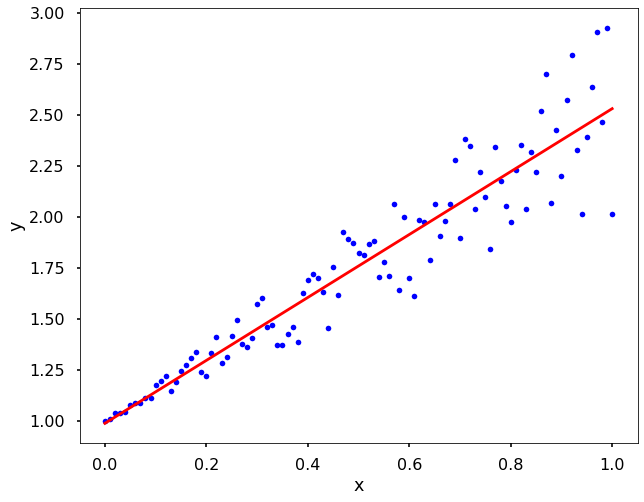

In [13]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Can also use the lstsq method to find parameters as well.

In [14]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.54156407]
 [0.98812295]]


We can also perform transformations on functions that are not linear in order to perform linear regression. For a function that is raised to a power you can take the log of both sides of the function to get it in a linear form.

Practice: Perform log transformation to do linear regression

In [15]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))

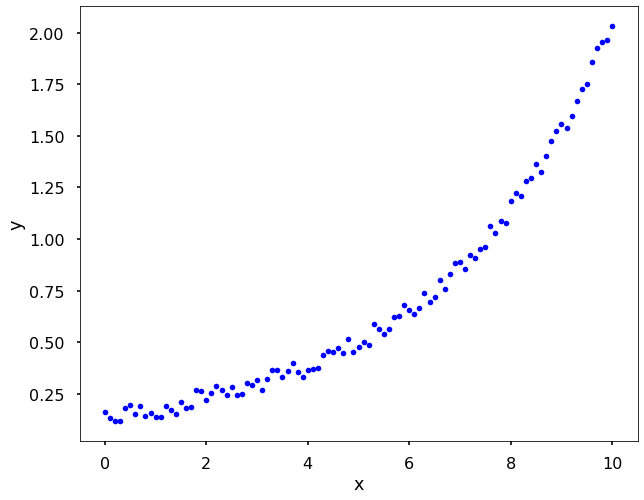

In [16]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [17]:
#Perform log transformation and then linear regression
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f'alpha={alpha}, beta={beta}')

alpha=0.13100115040899327, beta=0.27169099038595973


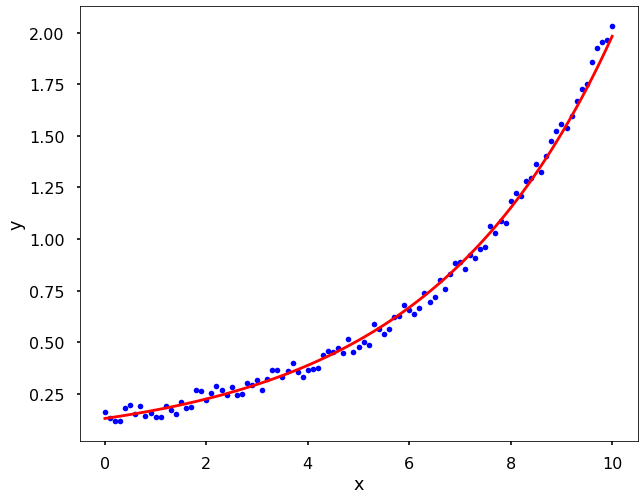

In [18]:
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We can also use different python methods to perform polynomial regression. With a given set of data points we can use different order polynomials to fit the data. The coefficients are still estimated by minimized the error of the residuals. 

Practice: Fit different polynomials onto data

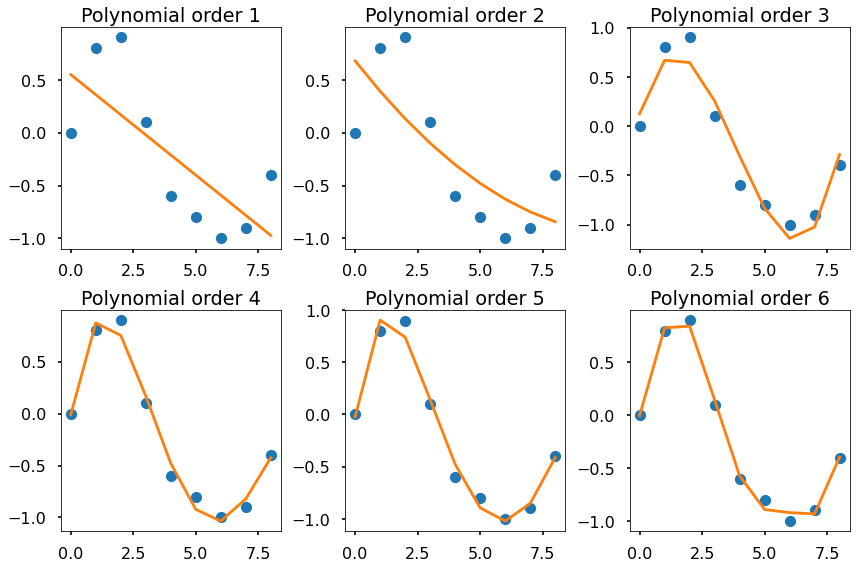

In [19]:
#Set data points
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

The above plots show the different curves using different polynomials. While the higher order polynomials offer more flexibility, but it the order depends on the specificity of the problem. 